<a href="https://colab.research.google.com/github/Gimmi-07/FFML_Projects_and_Labs/blob/main/Project_Module_09_(b).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJECT

FMML Module 09, Project (b) <br>
 NAME: Grishma Yenchilwar ( grishma.yenchilwar.cse@ghrce.raisoni.net ) <br>
 Date: 23 Mar 2024 <br>

# Module 9(b): Convolutional Neural Networks Project

## Module coordinator: Kushagra Agarwal



<img src="https://hub.packtpub.com/wp-content/uploads/2018/04/iStock-851960058-696x464.jpg" width=850px/>

In this project, you will understand how you can perform emotion recognition using CNNs in a step-by-step manner. To make your task easier, we provide you the starter code for the project. It is expected that you should try to understand the project statement properly and perform the tasks in sequence. We will be using Pytorch framework for the implementation. You need to fill in the missing code parts to achieve a particular task. At the end, you will have a basic implementation ready for an emotion detection application.

Basic steps involved in Emotion Recognition:
- Face detection
- Building classifier
- Classifying emotions

We will use a popular FER2013 dataset for this project.

## Task 1: Explore the dataset
The dataset contains 48 x 48 grayscale facial images of faces.The faces have been automatically registered so that the face is more or less centred and occupies about the same amount of space in each image. The task is to categorize each face based on the emotion shown in the facial expression into one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral).

<img src="https://www.researchgate.net/profile/Chaudhary-Aqdus/publication/349055345/figure/fig3/AS:987834383085568@1612529478973/FER-2013-sample-images-for-facial-emotion-recognition.jpg" width=650px/>

Import libraries

In [ ]:
# We have imported the necessary packages here. Feel free to import anything more you need!
import torch
import torchvision
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dlib
import cv2
from PIL import Image

### Download and load dataset

In [ ]:
!gdown https://drive.google.com/uc?id=1YrNrok2Z1udWWIpejXIdLk7duUq87s0N
!unzip fer2013.csv.zip

Downloading...
From (original): https://drive.google.com/uc?id=1YrNrok2Z1udWWIpejXIdLk7duUq87s0N
From (redirected): https://drive.google.com/uc?id=1YrNrok2Z1udWWIpejXIdLk7duUq87s0N&confirm=t&uuid=78881493-7aaa-4bc7-89ff-325832f685f0
To: /content/fer2013.csv.zip
100% 101M/101M [00:02<00:00, 38.5MB/s] 
Archive:  fer2013.csv.zip
replace fer2013.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# Load the dataset csv using pandas package. It displays the data in tabular form
emotion_data = pd.read_csv('./fer2013.csv')
print(emotion_data)

In [ ]:
# Class dictionary for dataset
classes = {0:"Angry", 1:"Disgust", 2:"Fear", 3:"Happy", 4:"Sad", 5:"Surprise", 6:"Neutral"}

### Visualize a few images from dataset

In [ ]:
fig = plt.figure(figsize=(12,4))
for i in range(10):
  ax = plt.subplot(2,5,i+1)
  # This is how we access ith row in 'pixels' column in the dataset table
  img = emotion_data.iloc[i]['pixels'].split(' ') # Converting into array of ints
  img = np.array(img).astype(int)

  # Labels for our dataset
  label = int(emotion_data.iloc[i]['emotion'])
  ax.imshow(img.reshape((48,48)), cmap='gray')
  ax.set_title(classes[label])
  ax.set_axis_off()
plt.show()

In [ ]:
names, counts = np.unique(emotion_data['Usage'].to_numpy(), return_counts=True)
print('Number of samples in {} = {}'.format(names[0], counts[0])) #testset
print('Number of samples in {} = {}'.format(names[1], counts[1])) #valset
print('Number of samples in {} = {}'.format(names[2], counts[2])) #trainset

### Distribution of class labels

In [ ]:
# Plot bar chart showing number of samples per class in the train set
temp_train = emotion_data.loc[emotion_data['Usage'] == 'Training']
df_temp_train = temp_train.sort_values(by = "emotion", inplace = False)
fig = plt.figure(figsize = (7, 5))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each Emotion in Train Data", fontsize = 20)
sns.countplot(x = "emotion", data = df_temp_train)
plt.grid()
for i in ax.patches:
    ax.text(x = i.get_x() + 0.2, y = i.get_height()+1.5, s = str(i.get_height()), fontsize = 20, color = "grey")
plt.xlabel("Classes"+ str(classes))
plt.ylabel("Count", fontsize = 15)
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 40)
plt.show()

### Task: Similarly, write the code below to plot the charts for remaining two sets also.

Note the imbalance in the data through above graphs.

Face detection: Many applications involving facial images as input data require face detection in the pipeline at this step. Here, we localise the face in the given image removing the irrelevant parts, making the face centered and occupying most of the part in the image. As mentioned earlier, our dataset already has more or less centered faces, so we will skip this step for now but when using some other dataset or using your own images (eg. from webcam) as you will do later, you can do this step to get a proper cropped face from the image.

## Task 2: Data preprocessing

### Creating train, validation and test sets

In [ ]:
X_train, y_train = [], []
X_val, y_val = [], []
X_test, y_test = [], []

for index, row in emotion_data.iterrows():
  k = row['pixels'].split(" ")

  if row['Usage'] == 'Training':
    X_train.append(np.array(k))
    y_train.append(row['emotion'])

  # Similarly write the conditions for test and val splits here
  ###### YOUR CODE HERE  ######



X_train, y_train = np.array(X_train), np.array(y_train)
X_val, y_val = np.array(X_val), np.array(y_val)
X_test, y_test = np.array(X_test), np.array(y_test)

print('Training set shape: ', X_train.shape, y_train.shape)
print('Validation set shape: ', X_val.shape, y_val.shape)
print('Testing set shape: ', X_test.shape, y_test.shape)

Training set shape:  (28709, 2304) (28709,)
Validation set shape:  (0,) (0,)
Testing set shape:  (0,) (0,)


In [ ]:
# To get data between 0 and 1
X_train = X_train.astype(float) / 255.
X_test = X_test.astype(float) / 255.
X_val = X_val.astype(float) / 255.

We will define a dataset wrapper over Pytorch Dataset class which takes in the numpy arrays we created and returns a sample with required preprocessing.

In [ ]:
class Fer2013Dataset(Dataset):
  def __init__(self, x, y, transforms=None):
    self.x = x.reshape((-1, 48, 48))
    self.y = y
    self.transforms= transforms

  def __getitem__(self, index):
    img, y = self.x[index], self.y[index]

    if self.transforms is not None:
        img = self.transforms(img)
    return img, y

  def __len__(self):
    return len(self.y)

In [ ]:
batch_size=32

transform = transforms.ToTensor()

# Create tensor dataset from above tensors
train_dataset = Fer2013Dataset(X_train, y_train, transforms=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, num_workers=2)

val_dataset = Fer2013Dataset(X_val, y_val, transforms=transform)
val_loader = DataLoader(val_dataset, batch_size=batch_size, num_workers=2)

test_dataset = Fer2013Dataset(X_test, y_test, transforms=transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size, num_workers=2)

## Task 3: Building a CNN model

In [ ]:
# Define your CNN architecture here
# To start with, let's say you can create a model with 4 relu-activated convs,
# each followed by a pooling layer. Then, you can add 2-3 fully connected layers

class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        #### YOUR CODE HERE  ####

    def forward(self,x):
        #### YOUR CODE HERE  ####
        return x

In [ ]:
# Device (CPU/GPU)
device = 'cpu' #torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Initialize the CNN
model = Net().to(device)
print(model)

### Training/Testing functions

In [ ]:
def train(model, train_loader, loss_func, optimizer, num_epochs):

  # Training mode
  model.train()

  train_losses = []
  train_acc = []

  # Train the model
  for epoch in range(num_epochs):
    running_loss = 0
    running_acc = 0
    for i, (images, labels) in enumerate(train_loader):

      # clear gradients for this training step
      optimizer.zero_grad()

      # Forward pass
      output = model(images)

      # Calculate loss
      loss = loss_func(output, labels)

      # Backpropagation, compute gradients
      loss.backward()

      # Apply gradients
      optimizer.step()

      # Running loss
      running_loss += loss.item()

      # indices of max probabilities
      _, preds = torch.max(output, dim=1)

      # Calculate number of correct predictions
      correct = (preds.float() == labels).sum()
      running_acc += correct

      # Average loss and acc values
      epoch_loss = running_loss / len(train_loader.dataset)
      epoch_acc = running_acc / len(train_loader.dataset)

    train_losses.append(epoch_loss)
    train_acc.append(epoch_acc)
    print ('Epoch {}/{}, Loss: {:.4f}, Accuracy: {:.4f}'.format(epoch + 1, num_epochs, epoch_loss, epoch_acc*100))

  return train_losses, train_acc

In [ ]:
def test_model(model, testloader):
  correct = 0
  total = 0
  # Deactivate autograd engine (don't compute grads since we're not training)
  with torch.no_grad():
    for data in testloader:
        images, labels = data
        # Calculate outputs by running images through the network
        outputs = model(images)
        # The class with the highest value is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

  print('Accuracy of the network: %d %%' % (
      100 * correct / total))

## Task 4: Training & Evaluation

### Train the model

In [ ]:
# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()

# specify optimizer with learning rate
optimizer = None   # Pick an optimizer you think is suitable

history = train(model, train_loader, criterion, optimizer, num_epochs=1)

In [ ]:
# You can fine-tune your model looking at below plots
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2, 1)
ax.plot(np.arange(1,len(history[0])+1),history[0])
plt.xlabel('Loss')
plt.ylabel('Epochs')

ax = fig.add_subplot(1,2, 2)
ax.plot(np.arange(1,len(history[1])+1),history[1])
plt.xlabel('Accuracy')
plt.ylabel('Epochs')
plt.show()

### Evaluate your model

In [ ]:
# Visualize top K predictions
def visualize_prediction(image, model, k=3):
  model.eval()

  preds = model(image.unsqueeze(1).float())

  topk = torch.topk(preds, k, dim=1)
  topk = topk.indices.numpy()
  print('Top {} Predictions'.format(k))
  for i in range(3):
    print('{}) {}'.format(i+1, classes[topk[0][i]]))

  plt.imshow(image[0].numpy(), cmap='gray')
  plt.show()

1) Happy
2) Disgust
3) Angry


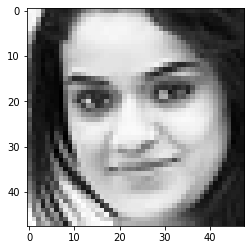


True label:  Happy


In [ ]:
image, label = test_dataset[1]
visualize_prediction(image, cnn)
print('\nTrue label: ', classes[int(label)])

In [ ]:
# Print accuracy on test data
true_labels, predicted_labels = test_model(model, test_loader)

---

# BONUS TASK

### How can you improve the performance of your model given that the number of datapoints is fixed?

##### Hint: A very simple fix (discussed in Lab 2) is to use a pretrained CNN model. The pretrained model could be trained on any dataset (eg Imagenet) and the first few layers of the same can be directly used for this task.

### You are encouraged to try out different pretrained models like ResNet/VGG/AlexNet and see how the performance improves. Do all the models result in similar accuracy?

To improve the performance of a model given a fixed number of datapoints, using a pretrained Convolutional Neural Network (CNN) model is an effective strategy. Pretrained models, such as ResNet, VGG, and AlexNet, have already been trained on large datasets (e.g., ImageNet) and have learned useful feature representations. By leveraging these pretrained models, you can fine-tune them for your specific task, which often leads to better performance, especially when you have a limited amount of data.

### Steps to Use Pretrained Models

1. **Choose a Pretrained Model:**
   Select a pretrained model like ResNet, VGG, or AlexNet. These models come with pre-trained weights from large-scale datasets like ImageNet.

2. **Load the Pretrained Model:**
   Load the chosen pretrained model and include the pre-trained weights. Most deep learning libraries (e.g., TensorFlow, PyTorch) offer utilities to load these models easily.

3. **Freeze Initial Layers:**
   Freeze the initial layers of the pretrained model to retain the learned features. Typically, you keep the initial layers frozen and fine-tune the later layers to adapt to your specific task.

4. **Modify the Final Layers:**
   Replace the final layers of the pretrained model with layers suitable for your specific task. For instance, if you are working on a classification task with a different number of classes, modify the output layer accordingly.

5. **Fine-Tune the Model:**
   Train the modified model on your dataset. Since the initial layers are already well-trained, the model can converge faster and potentially achieve better performance.

### Comparing Different Pretrained Models

#### ResNet
- **Architecture:** Residual Networks (ResNet) use skip connections to allow gradients to flow through the network more effectively, which mitigates the vanishing gradient problem.
- **Performance:** Known for its strong performance in various tasks due to its deep architecture and effective training.

#### VGG
- **Architecture:** VGG networks are characterized by their simplicity and use of small convolutional filters (3x3). They have a deep but straightforward architecture.
- **Performance:** VGG models are effective but can be computationally expensive due to their depth and large number of parameters.

#### AlexNet
- **Architecture:** AlexNet was one of the first deep networks to achieve significant performance gains in image classification tasks. It uses larger convolutional filters (e.g., 11x11, 5x5).
- **Performance:** While less complex than ResNet and VGG, AlexNet set the stage for modern CNN architectures. It performs well but may not match the accuracy of more recent models.

### Experiment and Evaluate

To determine the best model for your specific task, you should:

1. **Train and Evaluate Each Model:**
   Train and fine-tune ResNet, VGG, and AlexNet on your dataset. Evaluate their performance using relevant metrics (e.g., accuracy, F1-score).

2. **Compare Results:**
   Compare the results to see which model achieves the highest accuracy and best performance on your fixed dataset.


In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision import datasets, transforms

# Define data transforms
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load dataset
train_dataset = datasets.ImageFolder(root='path_to_train_data', transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

# Load a pretrained model
model = models.resnet50(pretrained=True)

# Freeze initial layers
for param in model.parameters():
    param.requires_grad = False

# Modify the final layer for the new task
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, num_classes)  # num_classes is the number of output classes in your task

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.fc.parameters(), lr=0.001)

# Fine-tune the model
model.train()
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

# Evaluate the model
# (similar steps for validation/testing)
